# **BUSINESS UNDERSTANDING**

## **Penjelasan**

**CAR EVALUATION**

Merupakan sebuah dataset yang berisi tentang beberapa data yang diambil dari banyak mobil yang bertujuan untuk memprediksi apakah mobil tersebut dapat diterima untuk digunakan dalam kepentingan sehari-hari, standar umum pasar, aturan keselamatan dan lain-lain.

Dataset dibuat oleh Marko Bohanec (marko.bohanec@ijs.si) pada bulan Juni 1997, dengan donatur dari data yang ada dalam dataset tersebut adalah Marko Bohanec sendiri dan Blaz Zupan (blaz.zupan@ijs.si).

Dataset ini mengevaluasi mobil diambil dari berbagai macam konsep:
```
   CAR                      kelayakan mobil
   . PRICE                  dari segi harga
   . . buying               harga beli
   . . maint                harga perbaikan
   . TECH                   dari segi teknis
   . . COMFORT              kenyamanan
   . . . doors              jumlah pintu
   . . . persons            jumlah orang yang bisa dimuat
   . . . lug_boot           ukuran bagasi
   . . safety               keamanan mobil
```
Atribut yang digunakan dalam dataset ini adalah yang ditulis menggunakan huruf kecil. Selain target/class (CAR), model ini memasukkan 3 kelas tambahan, yaitu: PRICE, TECH, COMFORT. Tiap konsep ini merupakan bagian dari fitur-fitur dibawahnya (lowercase).

Database ini berisi berbagai contoh dengan ada struktur informasi yang dihapus (uppercase), menyisakan CAR dan menghubungkannya secara langsung dengan enam atribut: buying, maint, doors, persons, lug_boot, safety.





# **DATA UNDERSTANDING**

## **Deskripsi Data**

Data diambil dari: [Car Evaluation - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/19/car+evaluation)

Dataset ini berisi atas 6 fitur, 1 class dan memiliki sebanyak 1728 data, fitur-fitur tersebut adalah:

    1. Buying (Categorical)
    2. Maintenance (Categorical)
    3. Door (Categorical)
    4. Person (Categorical)
    5. Lug Boot (Categorical)
    6. Safety (Categorical)

Sedangkan class-nya adalah tingkat kelayakan mobil tersebut. Di mana tingkat kelayakan tersebut dibagi menjadi 4 macam:

    1. Unaccaptable (tidak dapat diterima)
    2. Acceptable (dapat diterima)
    3. Good (bagus)
    4. Very Good (sangat bagus)


## **Penjelasan Fitur**

Fitur-fiturnya seperti yang sudah disebut di atas yaitu:

    1. Buying: adalah harga beli dari mobil tersebut, dalam dataset ini Buying dibagi menjadi 4 macam yaitu: v-high (sangat mahal), high (mahal), med (normal), low (murah).
    2. Maintenance: adalah harga perawatan dari mobil, untuk data Maintenance sendiri sama dengan data Buying, yaitu: v-high, high, med, dan low.
    3. Door: adalah jumlah pintu yang ada di mobil tersebut, Door dibagi menjadi 4 jenis, yaitu: 2, 3, 4, 5-more.
    4. Person: adalah jumlah orang yang muat dalam mobil tersebut, dibagi menjadi 3 jenis, yaitu: 2, 4, more.
    5. Lug Boot: ukuran bagasi mobil tersebut, dibagi menjadi 3 jenis, yaitu: small, med, big
    6. Safety: adalah tingkat (rating) keselamatan dari mobil, dibagi 3 jenis, yaitu: low, med, high.
    
    


## **Penjelasan Class**

Class dalam dataset ini berupa data **Categorical** yang menjelaskan tingkat kelayakan/penerimaan mobil tersebut di kalangan masyarakat, tingkatan tersebut dibagi menjadi 4 macam yaitu:

    1. Unacceptable: menunjukkan bahwa mobil tersebut tidak dapat diterima atau belum layak sebab faktor tertentu seperti biaya perawatan yang mahal, dsb.
    2. Acceptable: menunjukkan bahwa mobil tersebut sudah layak dan dapat diterima.
    3. Good: menunjukkan bahwa mobil tersebut merupakan mobil yang bagus, memiliki atribut yang lebih bagus daripada class "acceptable".
    4. Very Good: menunjukkan bahwa mobil tersebut merupakan mobil yang sangat bagus dan sangat layak untuk diperjual belikan.

### **Jumlah data tiap class**

Jumlah data dalam setiap class:

| class  | jumlah | jumlah(%)  |
| ------ | ------ | ---------- |
| unacc  | 1210   | (70.023 %) |
| acc    | 384    | (22.222 %) |
| good   | 69     | (3.993 %)  |
| v-good | 65     | (3.762 %)  |


## **Inisialisasi Data**

In [81]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df = pd.read_csv(url, names=column_names)

df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### **Konversi data**

Karena tiap fitur dan class dalam dataset ini berupa data Categorical, maka harus dikonversi menjadi numeric agar data bisa diproses.

In [82]:
buying = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
maint = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
doors = {'2':0, '3':1, '4':2, '5more':3}
persons = {'2':0, '4':1, 'more':2}
lug_boot = {'small':0, 'med':1, 'big':2}
safety = {'low':0, 'med':1, 'high':2}
target = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

df_kon = df.copy()

df_kon['buying'] = [buying[size] for size in df['buying']]
df_kon['maint'] = [maint[size] for size in df['maint']]
df_kon['doors'] = [doors[size] for size in df['doors']]
df_kon['persons'] = [persons[size] for size in df['persons']]
df_kon['lug_boot'] = [lug_boot[size] for size in df['lug_boot']]
df_kon['safety'] = [safety[size] for size in df['safety']]
df_kon['class'] = [target[size] for size in df['class']]

df_kon

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,3,2,1,1,2
1724,0,0,3,2,1,2,3
1725,0,0,3,2,2,0,0
1726,0,0,3,2,2,1,2


## **Visualisasi data**

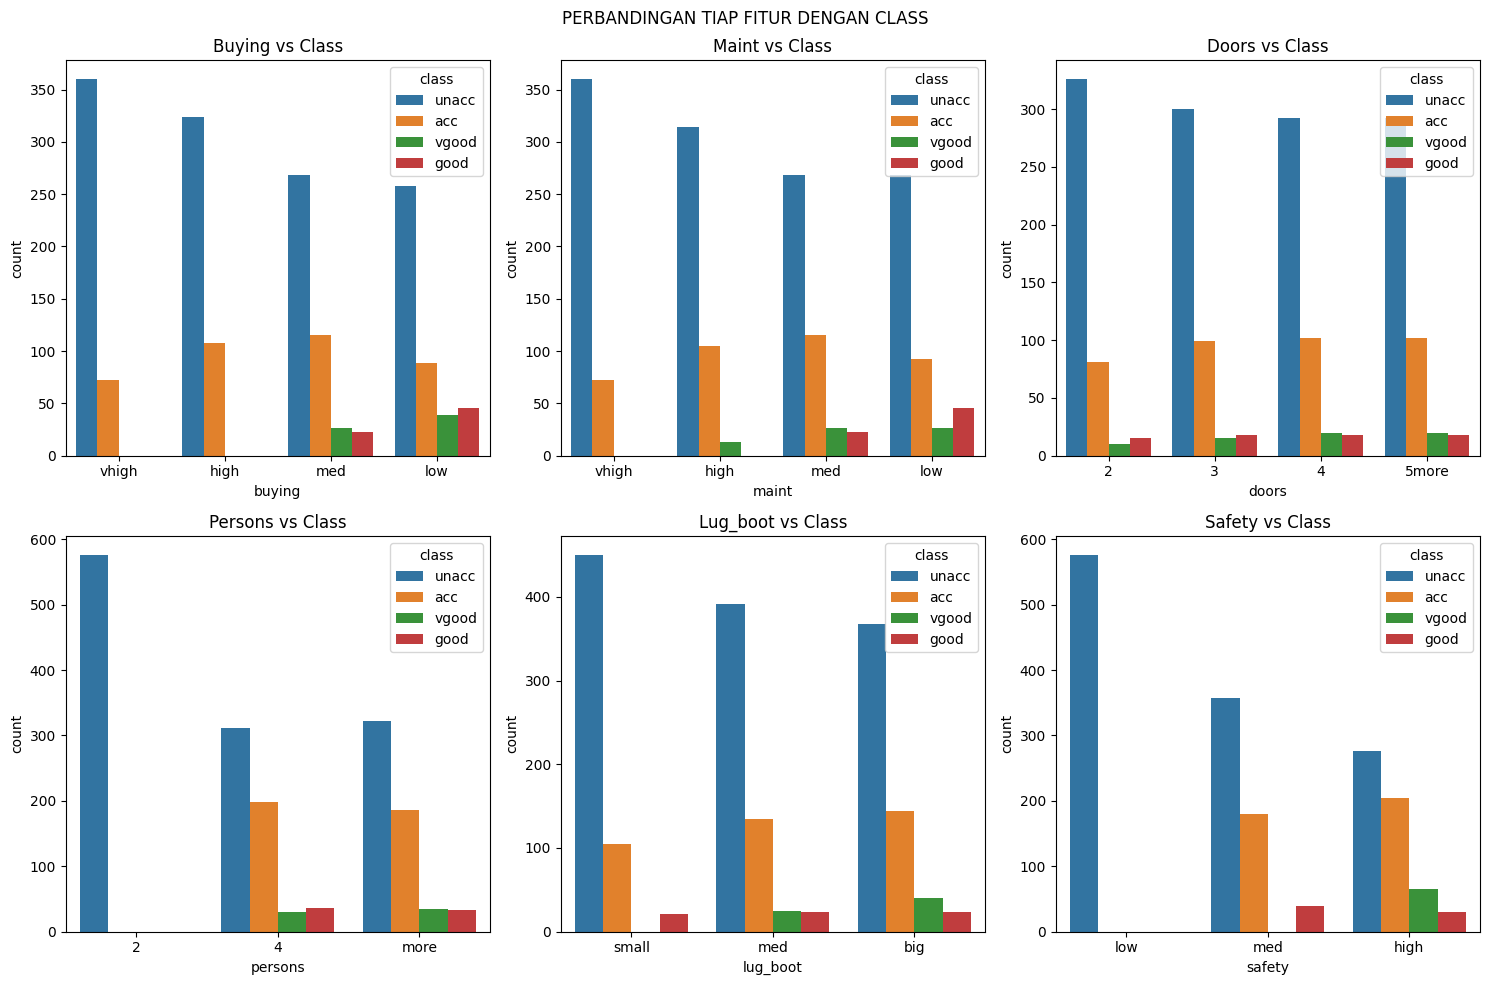

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('PERBANDINGAN TIAP FITUR DENGAN CLASS')

features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.countplot(x=feature, hue='class', data=df, ax=axs[row, col])
    axs[row, col].set_title(f'{feature.capitalize()} vs Class')

plt.tight_layout()
plt.show()


Plot di atas menunjukkan perbandingan tiap class dengan fitur, dapat dibaca seperti berikut:

```
1. Untuk fitur buying:
    a. Class untuk value "vhigh" terdiri dari unacc dan acc, dengan class unacc lebih banyak daripada class acc.
    b. Class untuk value "high" terdiri dari unacc dan acc, dengan class unacc lebih banyak daripada class acc.
    c. Class untuk value "med" terdiri dari unacc, acc, vgood, dan good, dengan class terbanyak sesuai urutan unacc > acc > vgood > good.
    d. Class untuk value "low" terdiri dari unacc, acc, vgood, dan good, dengan class terbanyak sesuai urutan unacc > acc > good > vgood.

2. dst.
```



## **Missing values**

In [84]:
print(df.isnull().sum())

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


Kode di atas menunjukkan bahwa semua fitur dan class tidak ada data null atau data kosong atau missing values dari setiap fitur dan class yang tersedia.

## **Seleksi Fitur**

Seleksi fitur (feature selection) adalah proses memilih subset fitur yang paling relevan dan informatif dari kumpulan data asli untuk digunakan dalam membangun model. Tujuannya adalah untuk meningkatkan kinerja model, mengurangi overfitting, dan mengurangi kompleksitas komputasi dengan menggunakan hanya fitur-fitur yang paling penting.

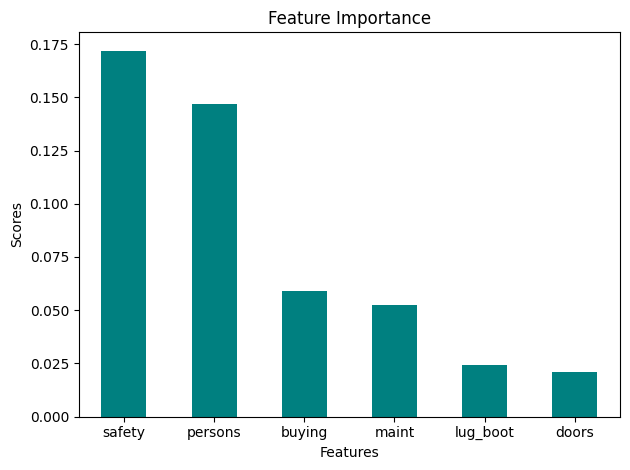

In [85]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(df_kon.iloc[:, :-1], df_kon['class'])
feat_importances = pd.Series(importances, index=df.columns[:-1])

feat_importances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.ylabel('Scores')
plt.xlabel('Features')
plt.title('Feature Importance')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, bahwa fitur paling penting dalam dasaet ini adalah fitur "safety", dan fitur yang paling tidak penting adalah "doors"

## **Data Balance**

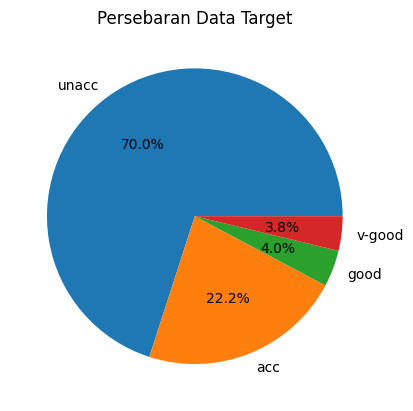

In [86]:
sizes = [70.023, 22.222, 3.993, 3.762]
labels = ['unacc', 'acc', 'good', 'v-good']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Persebaran Data Target')
plt.show()

Program kode di atas menunjukkan bahwa data class tidak merata, maka bisa dipastikan bahwa persebaran class dalam dataset ini tidaklah seimbang (balance)

## **Outlier**

**Z-Score**

Salah satu metode yang digunakan untuk mendeteksi outlier adalah menggunakan Z-Score. Deteksi outlier menggunakan Z-Score adalah menghitung tiap data pada tiap kolom dikurangi nilai mean dari kolom tersebut, lalu hasilnya dibagi dengan standar deviasi dari kolom tersebut.

Setelah itu menentukan nilai threshold sebagai batas tertentu yang mana jika nilai z-score tadi melebihi nilai threshold maka dapat dikatakan sebagai outlier. Threshold yang biasa digunakan pada metode Z-Score adalah 2 atau 3

**NB:** Deteksi outlier hanya untuk data fitur, label/class/target tidak termasuk.

**Contoh:**


In [87]:
df_kon['buying'][0]

3

In [88]:
# Mean
df_kon['buying'].mean()

1.5

In [89]:
# Standar Deviasi
df_kon['buying'].std()

1.1183576344329658

Data dengan index [0] pada fitur buying bernilai 3 setelah dikonversi, menghitung Z-Score dengan rumus:

$$
    \\
    Z = \frac{x-μ}{σ}
$$

Dengan nilai x = 3, maka didapat:

$$
    \\
    Z = \frac{3-1.5}{1.1183576344329658}
    \\
    Z = 1.3416407864998738
$$

Jika hasil ``` 1.3416407864998738 ``` melebihi threshold, maka nilai tersebut termasuk outlier



In [90]:
def detectOutliers(feature):
    z_score = (df_kon[feature] - df_kon[feature].mean()) / df_kon[feature].std()
    return z_score

def outliers(outliers, feature):
    if outliers.empty:
        print("Outlier pada fitur", feature, "= 0")
    else:
        print("Outlier pada fitur", feature, "=", int(outliers.size/df_kon.shape[1]))

In [91]:
import numpy as np

df_out = df_kon.copy()

df_out['buying'] = detectOutliers('buying')
df_out['maint'] = detectOutliers('maint')
df_out['doors'] = detectOutliers('doors')
df_out['persons'] = detectOutliers('persons')
df_out['lug_boot'] = detectOutliers('lug_boot')
df_out['safety'] = detectOutliers('safety')

# Menentukan threshold
threshold = 3
outliers_buying = df_out[df_out['buying'] > threshold]
outliers_maint = df_out[df_out['maint'] > threshold]
outliers_doors = df_out[df_out['doors'] > threshold]
outliers_persons = df_out[df_out['persons'] > threshold]
outliers_lug_boot = df_out[df_out['lug_boot'] > threshold]
outliers_safety = df_out[df_out['safety'] > threshold]

outliers(outliers_buying, 'buying')
outliers(outliers_maint, 'maint')
outliers(outliers_doors, 'doors')
outliers(outliers_persons, 'persons')
outliers(outliers_lug_boot, 'lug_boot')
outliers(outliers_safety, 'safety')

Outlier pada fitur buying = 0
Outlier pada fitur maint = 0
Outlier pada fitur doors = 0
Outlier pada fitur persons = 0
Outlier pada fitur lug_boot = 0
Outlier pada fitur safety = 0


Tidak ada outlier dari semua fitur

# **PREPROCESSING**

## **Seleksi Fitur**

Akurasi setiap fitur yang di drop berurutan dari fitur dengan information gain paling rendah.

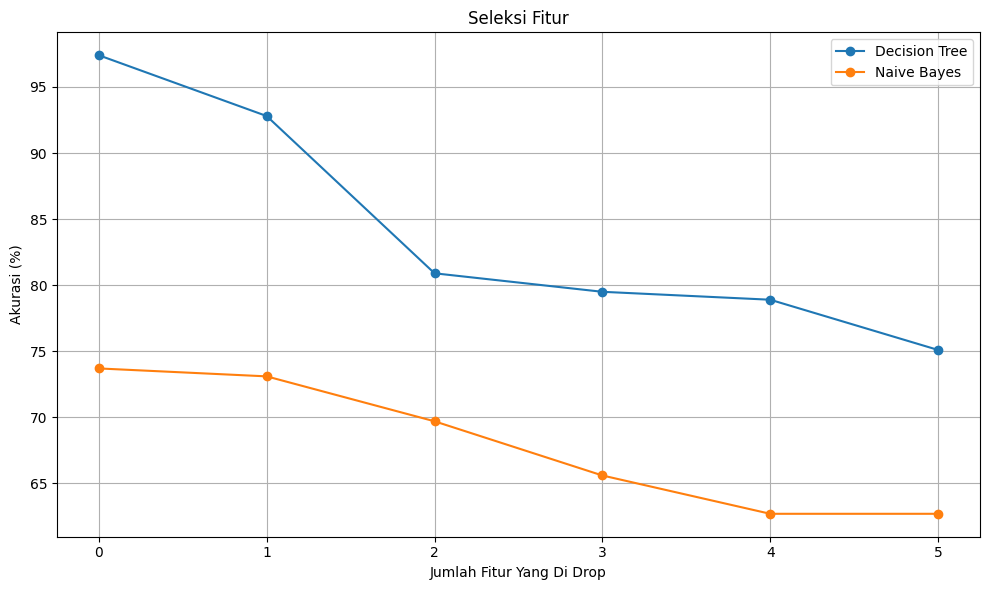

In [92]:
dropped_features = [
    [],
    ['doors'],
    ['doors', 'maint'],
    ['doors', 'maint', 'lug_boot'],
    ['doors', 'maint', 'lug_boot', 'buying'],
    ['doors', 'maint', 'lug_boot', 'buying', 'persons']
]

naive_bayes_scores = [73.7, 73.1, 69.7, 65.6, 62.7, 62.7]
decision_tree_scores = [97.4, 92.8, 80.9, 79.5, 78.9, 75.1]

plt.figure(figsize=(10, 6))

plt.plot(range(1, len(dropped_features) + 1), decision_tree_scores, marker='o', label='Decision Tree')
plt.plot(range(1, len(dropped_features) + 1), naive_bayes_scores, marker='o', label='Naive Bayes')

plt.xlabel('Jumlah Fitur Yang Di Drop')
plt.ylabel('Akurasi (%)')
plt.title('Seleksi Fitur')
plt.xticks(range(1, len(dropped_features) + 1), [len(features) for features in dropped_features])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Plot di atas menunjukkan bahwa untuk model Decision Tree, akurasi terbaik didapat ketika tidak ada satupun fitur yang dihilangkan, sedangkan pada model Naive Bayes juga sama akurasi terbaiknya adalah ketika tidak ada fitur yang dihilangkan.

## **Balancing Data**

Memisah data fitur (x) dan target (y)

In [93]:
x = df_kon.iloc[:,:-1]
y = df_kon['class']

**Metode Balancing**

**RandomOverSampler** adalah salah satu metode balancing data yang memungkinkan semua data yang tersedia diberi jumlah yang sama dengan data yang jumlah awalnya paling banyak, dalam kasus ini data yang jumlah awalnya paling banyak adalah "unacc" sebanyak 1210, jadi ke 3 class lainnya akan mengikuti jumlah tersebut, sehingga total data yang ada dalam suatu dataset akan bertambah sebanyak jumlah data class tertinggi dikali banyaknya class.

Metode lain dalam balancing data adalah **RandomUnderSampler**, kebalikan dari RandomOverSampler yaitu semua data yang tersedia akan diberi jumlah yang sama dengan data yang jumlah awalnya paling sedikit, dan data akan berkurang.

In [94]:
#from imblearn.under_sampling import RandomUnderSampler

#sampler = RandomUnderSampler(random_state=1)

#x_resample, y_resample = sampler.fit_resample(x, y)

#print(pd.Series(y_resample).value_counts())

In [95]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=1)

x_resample, y_resample = sampler.fit_resample(x, y)

print(pd.Series(y_resample).value_counts())

0    1210
1    1210
3    1210
2    1210
Name: class, dtype: int64


Perbandingan Penggunaan RandomOverSampler (ROS) vs RandomUnderSampler (RUS), untuk tiap model yang digunakan dalam kasus ini

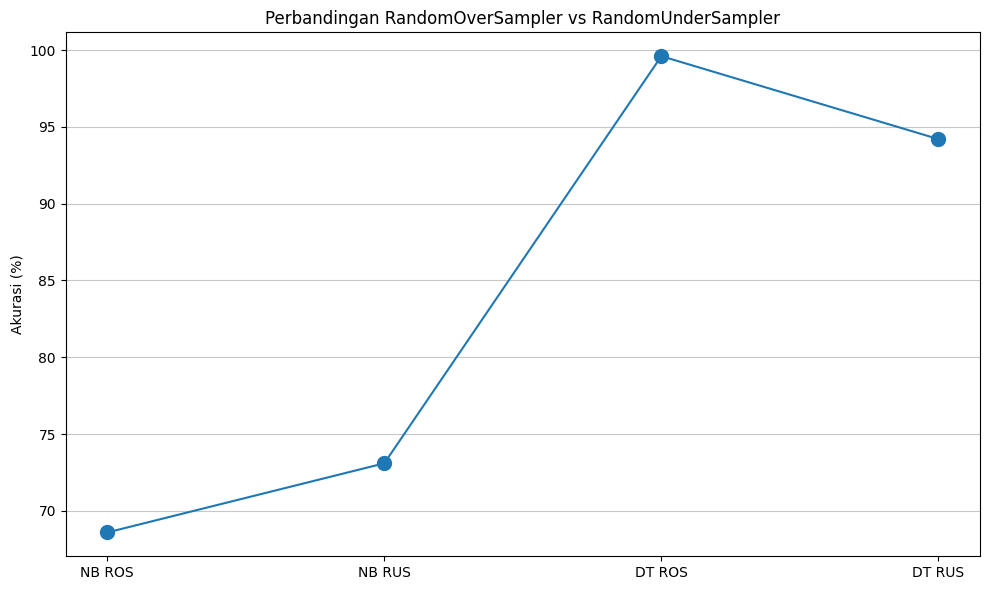

In [96]:
samplers = ['NB ROS', 'NB RUS', 'DT ROS', 'DT RUS']
accuracies = [68.6, 73.1, 99.6, 94.2]

plt.figure(figsize=(10, 6))
plt.plot(samplers, accuracies, marker='o', linestyle='-', markersize=10)

plt.title('Perbandingan RandomOverSampler vs RandomUnderSampler')
plt.ylabel('Akurasi (%)')


plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


Berdasarkan plot di atas dapat disimpulkan bahwa penggunaan RandomOverSampler memiliki hasil akurasi lebih tinggi pada model Decision Tree sebesar 99.6%, daripada menggunakan RandomUnderSampler dengan kedua modelnya.

## **Splitting Data**

Membagi data ke dalam bentuk data training dan data testing, di mana data training digunakan untuk melatih model dan data testing digunakan untuk memprediksi akurasi model yang sudah terlatih.

Pada kasus ini data training yang digunakan adalah sebanyak 80% dan data testing yang digunakan adalah 20%.

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.2, random_state=1)

## **Normalisasi data**

**Min-Max Scaler**


MinMaxScaler merupakan suatu metode preprocessing yang mengubah data awal menjadi data dengan range antar 0 dan 1.

Data dengan nilai terbesar dalam suatu fitur akan bernilai 1 dan data terkecil akan bernilai 0, untuk data yang berada di antara keduanya di skalakan.

In [98]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train_mm = mm.fit_transform(x_train)
x_test_mm = mm.transform(x_test)

Untuk dapat menghitung Min-Max Scaler secara manual diperlukan rumus berikut:

$$
    X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Ambil contoh fitur lug_boots yang memiliki 3 value (small, med, big), yang setelah dikonversi akan menjadi (small: 0, med: 1, big: 2), nilai minimum adalah 0 dan nilai maksimum adalah 2.
Menggunakan rumus di atas untuk menskalakan nilai dari lug_boots adalah:
$$
    X_{0} = \frac{0 - 0}{2 - 0} = 0
    \\
    X_{1} = \frac{1 - 0}{2 - 0} = 0.5
    \\
    X_{2} = \frac{2 - 0}{2 - 0} = 1
    \\
$$

# **MODELLING**

## **Naive Bayes**

Naive Bayes adalah sebuah metode klasifikasi yang berdasarkan pada teorema Bayes dengan asumsi bahwa setiap fitur yang digunakan untuk klasifikasi adalah independen satu sama lain.

Metode Naive Bayes menggunakan teorema Bayes, yang menyatakan bahwa probabilitas kondisional atau `P(A∣B) `
dapat dihitung dengan rumus:

$$
P(A \mid B)=\frac{P(B \mid A) \times P(A)}{P(B)}
$$

Ada beberapa metode Naive Bayes:

    1.   Naive Bayes Gaussian: biasanya untuk data numerik.
    2.   Naive Bayes Multinomial: biasanya untuk data kategorikal.
    3.   Naive Bayes Bernoulli: biasanya digunakan untuk data biner (1, 0).

Pada kasus ini sendiri metode Naive Bayes yang digunakan adalah metode Gaussian, karena data yang diolah berupa data kategorikal yang dikonversi ke data numerik.

In [99]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(x_train_mm, y_train)

GaussianNB()

## **Decision Tree**

Decision Tree (Pohon Keputusan) adalah salah satu metode machine learning yang digunakan untuk pengambilan keputusan dan pemodelan prediktif. Decision Tree mengambil keputusan dengan membagi data ke dalam kelompok-kelompok yang semakin kecil berdasarkan serangkaian keputusan berbasis fitur-fitur dari data.

Metode ini memiliki 3 komponen yaitu akar, ranting, dan daun. Tiap komponennya terdiri dari 2 atau lebih cabang, dan atribut yang memiliki nilai Information Gain tertinggilah yang nantinya akan menjadi akar.

In [100]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train_mm, y_train)

DecisionTreeClassifier()

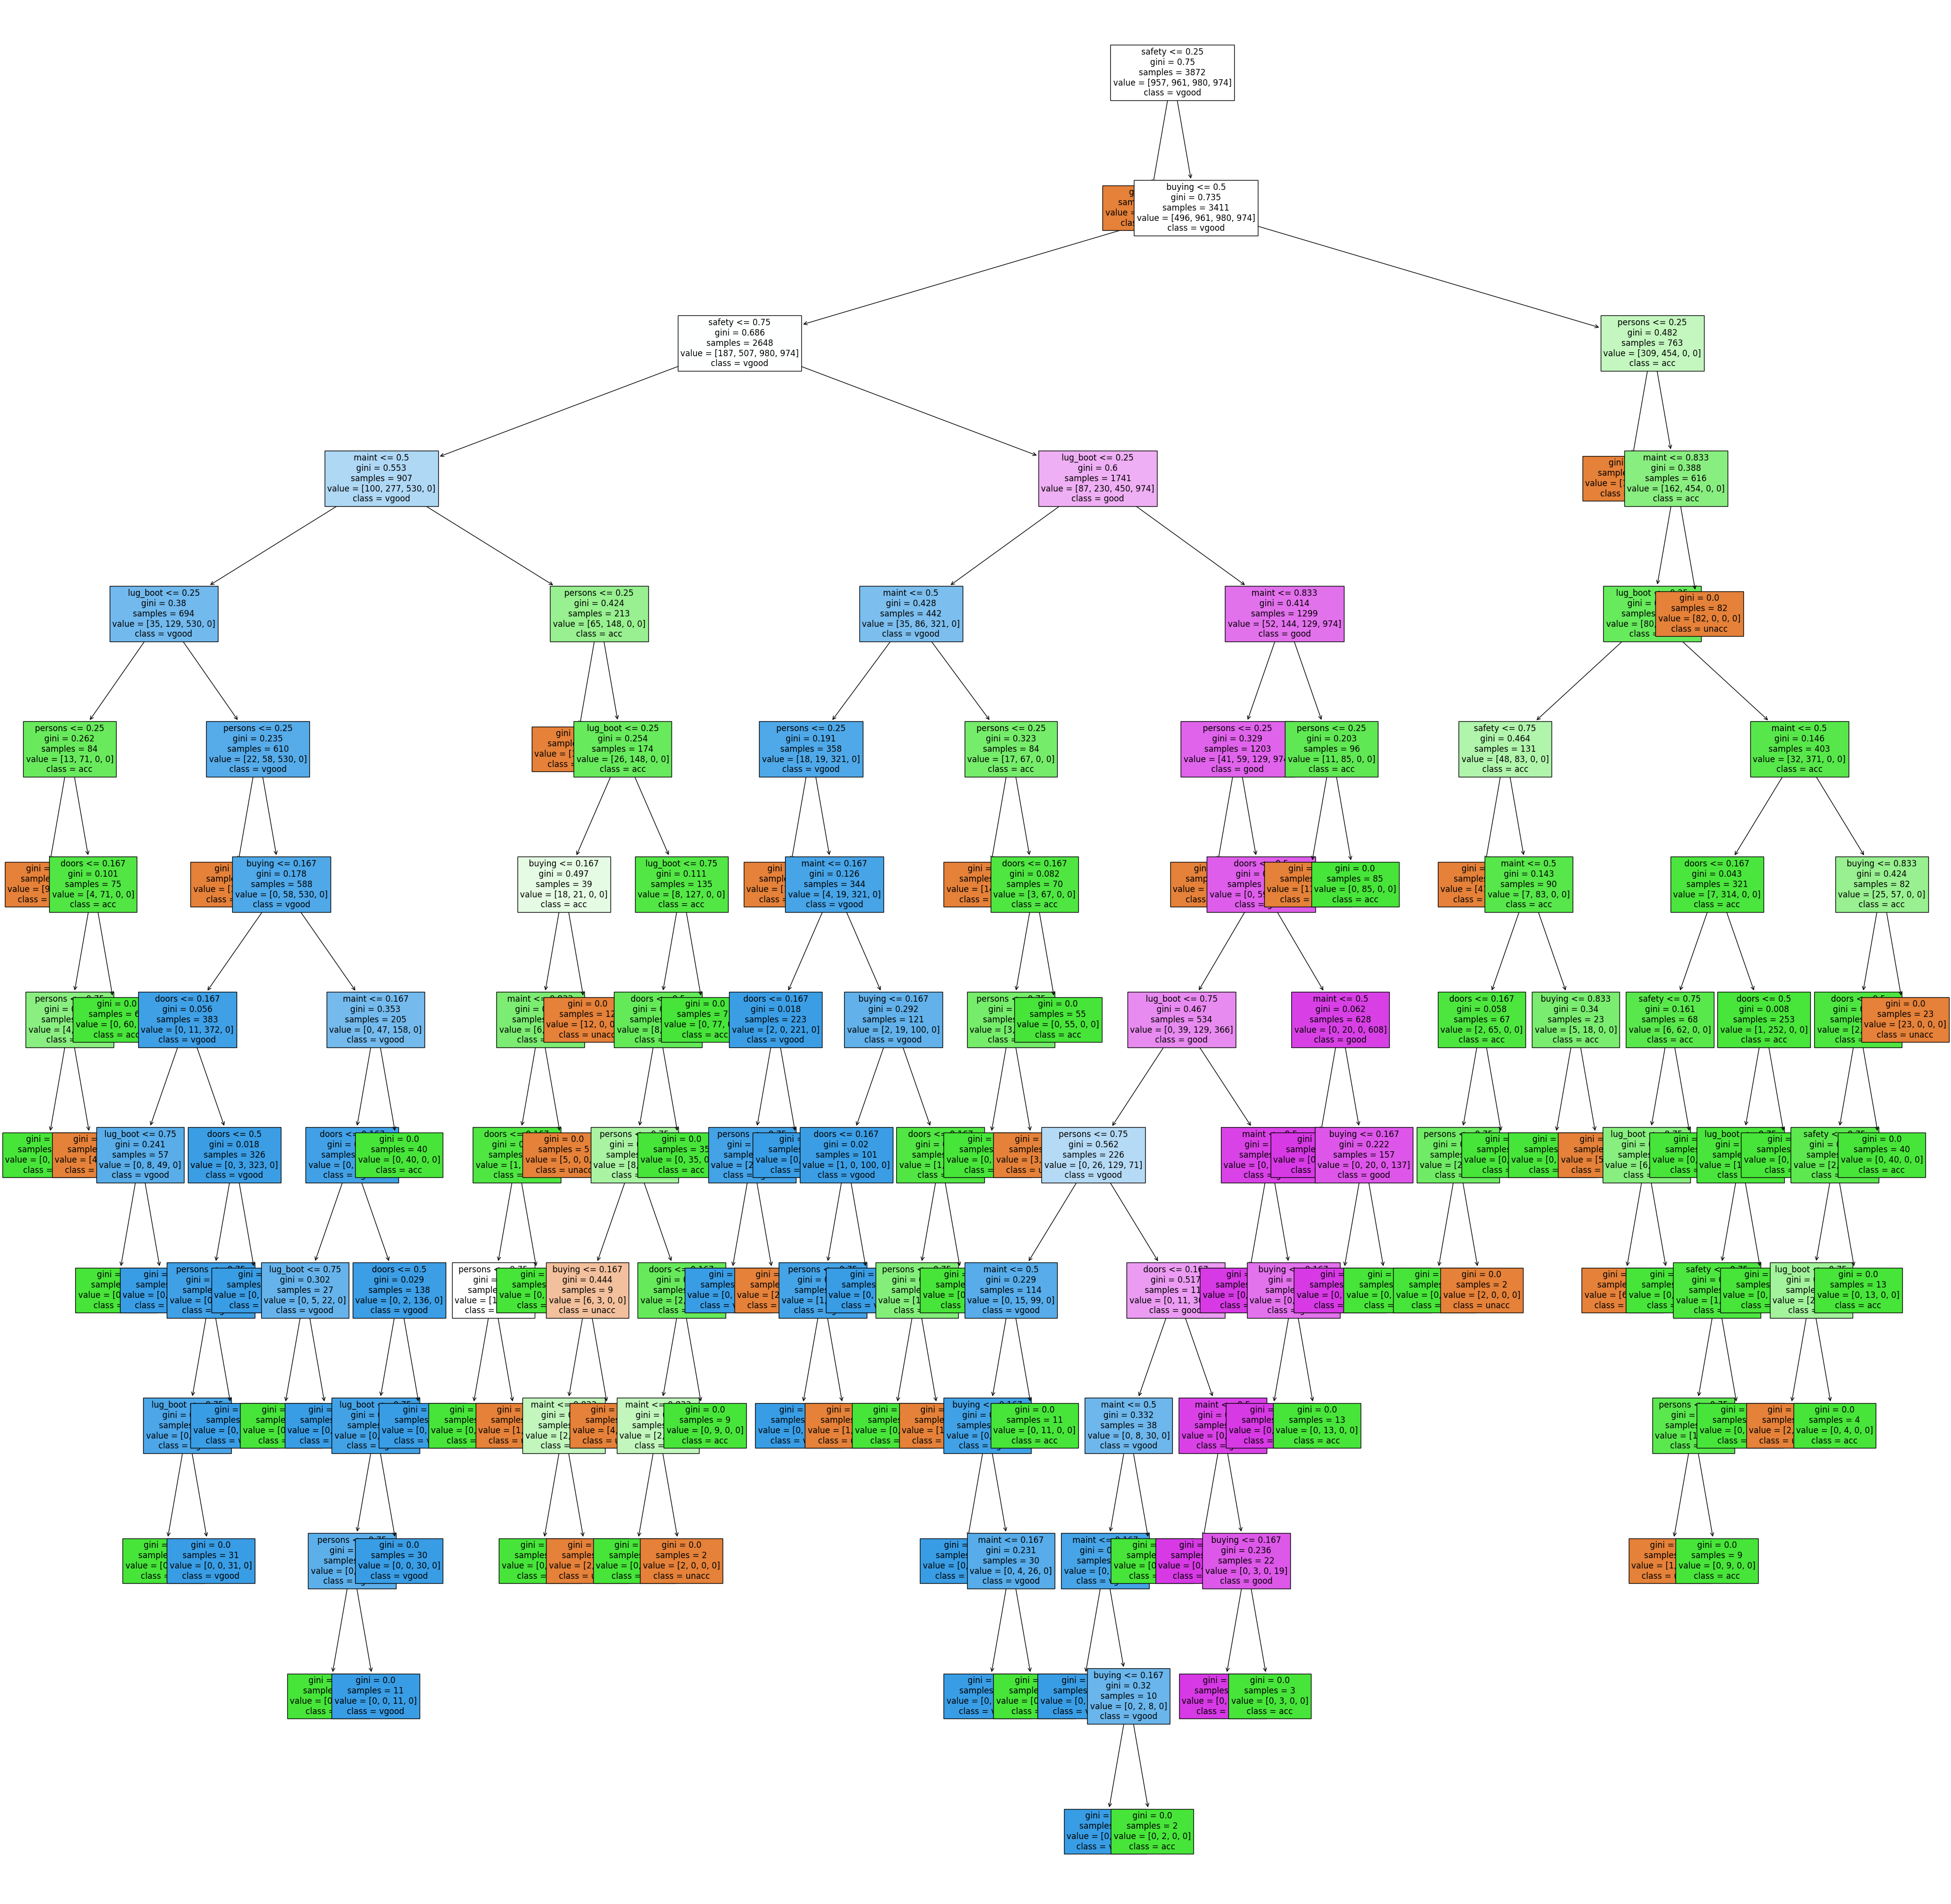

In [110]:
# Visualisasi Model Decision Tree

from sklearn import tree

plt.figure(figsize=(50, 50))
tree.plot_tree(
    clf_tree, filled=True,
    feature_names=df.columns.tolist(),
    class_names=df['class'].unique().tolist(),
    fontsize=12,
    max_depth=None
)
plt.show()

# **EVALUATION**

Pada tahap evaluation akan diketahui berapa akurasi dari model yang telah dipakai sebelumnya.

## **Naive Bayes**

In [102]:
# prediksi dari x_test
pred_nb = clf_nb.predict(x_test_mm)

In [103]:
# akurasi
from sklearn.metrics import accuracy_score

acc_nb = accuracy_score(y_test, pred_nb)
print('Akurasi dari model Naive Bayes (Min-Max Scaler) adalah', round((acc_nb*100),1),"%")

Akurasi dari model Naive Bayes (Min-Max Scaler) adalah 68.6 %


## **Decision Tree**

In [104]:
# prediksi dari x_test
pred_tree = clf_tree.predict(x_test_mm)

In [105]:
# akurasi
from sklearn.metrics import accuracy_score

acc_tree = accuracy_score(y_test, pred_tree)
print('Akurasi dari model Decision Tree (Min-Max Scaler) adalah', round((acc_tree*100),1),"%")

Akurasi dari model Decision Tree (Min-Max Scaler) adalah 99.6 %


# **DEPLOYMENT**

## **Save Model dan Preprocessing**

In [106]:
import pickle

with open('nbClf.pkl', 'wb') as file:
    pickle.dump(clf_nb, file)
with open('treeClf.pkl', 'wb') as file:
    pickle.dump(clf_tree, file)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(mm, file)

## **Streamlit**

Link deploy streamlit: [Car-Evaluation](https://car-evaluation-app.streamlit.app/)